[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Number of words removed (appearing in ≥80% of summaries): 23


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.290


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

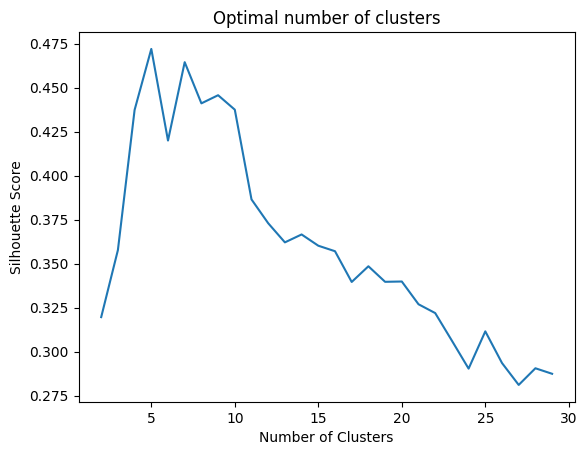

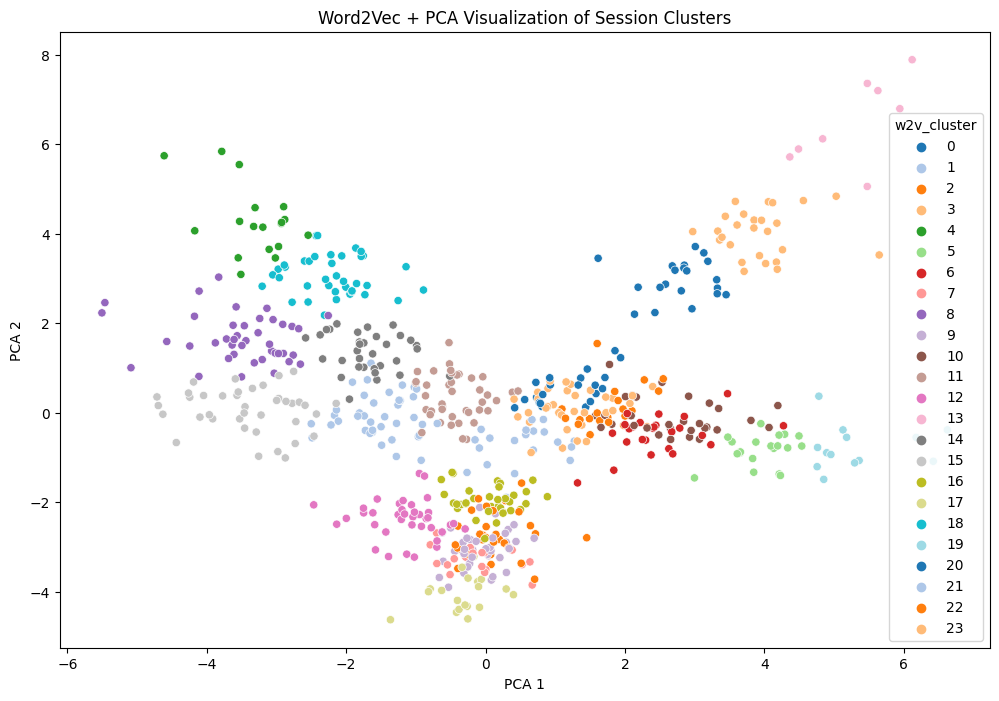


Cluster 0 (21 summaries):
[ 39  65  66  72  82  97 103 139 163 213 287 359 380 428 495 528 530 536
 559 609 627]

Cluster 1 (39 summaries):
[ 18  31  35  48  73  87  96 107 117 136 142 144 164 185 204 216 233 248
 249 252 309 327 329 367 372 396 402 437 471 489 493 497 511 553 565 606
 651 661 665]

Cluster 2 (31 summaries):
[ 33  50  77  83  95 105 109 119 138 149 167 219 223 241 273 297 354 356
 387 394 409 426 431 496 520 537 546 578 612 628 645]

Cluster 3 (26 summaries):
[ 34  84  91 115 125 172 191 217 278 357 364 385 403 404 420 446 454 460
 462 479 481 488 554 620 621 660]

Cluster 4 (18 summaries):
[ 25  36  53  80 113 161 177 196 197 205 212 323 436 503 529 558 643 654]

Cluster 5 (20 summaries):
[ 52  71 146 151 181 221 231 245 255 258 274 296 313 326 338 548 552 573
 596 598]

Cluster 6 (25 summaries):
[  8  49  93 130 135 180 203 220 264 283 320 365 455 467 476 515 545 566
 593 597 608 630 631 647 648]

Cluster 7 (18 summaries):
[ 11 158 174 256 270 279 298 303 355 383 47

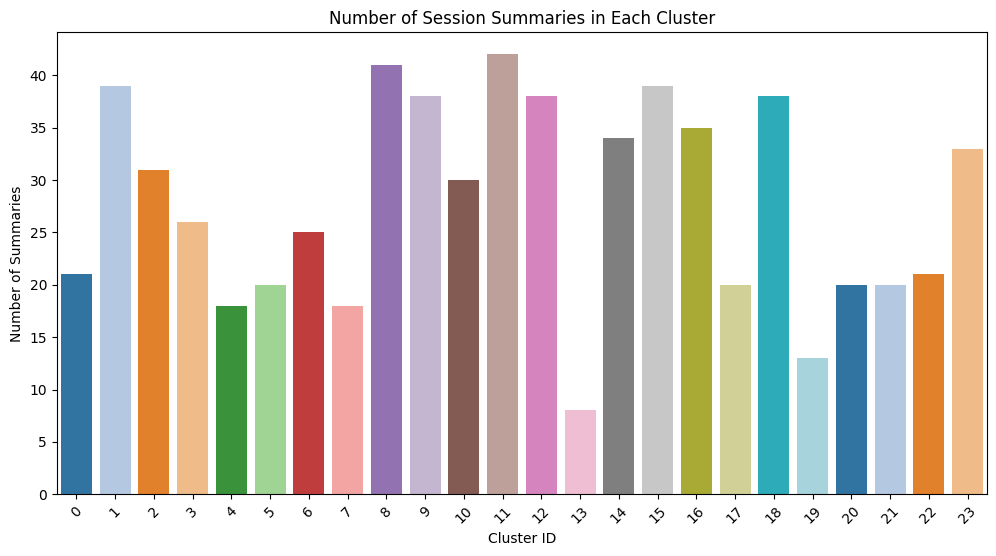


Summaries in Cluster 0 (Total: 21) — Sorted by Similarity:
Serial No: 380.0, Similarity: 0.9993
Serial No: 82.0, Similarity: 0.9961
Serial No: 559.0, Similarity: 0.9941
Serial No: 528.0, Similarity: 0.9939
Serial No: 359.0, Similarity: 0.9938
Serial No: 536.0, Similarity: 0.9936
Serial No: 163.0, Similarity: 0.9936
Serial No: 530.0, Similarity: 0.9927
Serial No: 72.0, Similarity: 0.9918
Serial No: 97.0, Similarity: 0.9918
Serial No: 39.0, Similarity: 0.9913
Serial No: 287.0, Similarity: 0.9894
Serial No: 495.0, Similarity: 0.9870
Serial No: 103.0, Similarity: 0.9851
Serial No: 428.0, Similarity: 0.9827
Serial No: 627.0, Similarity: 0.9820
Serial No: 65.0, Similarity: 0.9797
Serial No: 66.0, Similarity: 0.9794
Serial No: 213.0, Similarity: 0.9764
Serial No: 139.0, Similarity: 0.9751
Serial No: 609.0, Similarity: 0.9637

Summaries in Cluster 1 (Total: 39) — Sorted by Similarity:
Serial No: 367.0, Similarity: 0.9991
Serial No: 136.0, Similarity: 0.9973
Serial No: 216.0, Similarity: 0.995

In [81]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from collections import defaultdict
from collections import Counter
import joblib

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

NUM_OF_CLUSTERS = 24

# ------------------------
# 1. Load Data
# ------------------------
df = pd.read_csv("/kaggle/input/project/DS203_data.csv", encoding='ISO-8859-1')
df = df.dropna(subset=['Session_Summary'])

# ------------------------
# 2. Preprocessing
# ------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ------------------------
# 3. Remove high-frequency words (appearing in >=80% of summaries)
# ------------------------
# Count in how many summaries each word appears
summary_counts = Counter()

for tokens in df['tokens']:
    unique_tokens = set(tokens)
    summary_counts.update(unique_tokens)

# Threshold: words appearing in >=80% of summaries
threshold = 0.3 * len(df)
common_words = set([word for word, count in summary_counts.items() if count >= threshold])

print(f"\nNumber of words removed (appearing in ≥80% of summaries): {len(common_words)}")

# Remove those words from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in common_words])

# ------------------------
# 4. Train Word2Vec Model (CBOW)
# ------------------------
w2v_model = Word2Vec(sentences=df['filtered_tokens'], vector_size=300, window=300, min_count=2, sg=0, workers=4, seed=42)

# ------------------------
# 5. Average Word Vectors for Each Summary
# ------------------------
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['filtered_tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
X_w2v = np.vstack(df['vector'].values)

# ------------------------
# 6. KMeans Clustering (25 sessions)
# ------------------------
kmeans = KMeans(n_clusters=NUM_OF_CLUSTERS, random_state=42)
df['w2v_cluster'] = kmeans.fit_predict(X_w2v)

# Silhouette Score
sil_score = silhouette_score(X_w2v, df['w2v_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Silhouette scores for various K
scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_w2v)
    score = silhouette_score(X_w2v, labels)
    scores.append(score)

plt.plot(range(2, 30), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal number of clusters")
plt.show()

# ------------------------
# 7. Visualize using PCA
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_w2v)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['w2v_cluster'], palette='tab20', legend='full')
plt.title("Word2Vec + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ------------------------
# 8. Group Serial Numbers by Cluster
# ------------------------
cluster_groups = defaultdict(list)

for idx, row in df.iterrows():
    cluster_id = row['w2v_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = [np.array(cluster_groups[i]) for i in range(NUM_OF_CLUSTERS)]

# Display grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)

# ------------------------
# 9. Plot frequency of sessions in each cluster
# ------------------------
cluster_counts = df['w2v_cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab20')
plt.title("Number of Session Summaries in Each Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Summaries")
plt.xticks(rotation=45)
plt.show()

# ------------------------
# 10. Compute Global Word2Vec Vector for Each Cluster
# ------------------------

# Compute average vector for each cluster
global_cluster_vectors = {
    cluster_id: np.mean(X_w2v[df['w2v_cluster'] == cluster_id], axis=0)
    for cluster_id in range(NUM_OF_CLUSTERS)
}

# Dictionary to hold global vectors for each cluster
from scipy.spatial.distance import cosine

# Dictionary to store ordered summaries by similarity for each cluster
ordered_summaries_by_similarity = {}

for cluster_id in range(NUM_OF_CLUSTERS):
    # Get global vector for the cluster
    global_vector = global_cluster_vectors[cluster_id]
    
    # Get all summaries in this cluster
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'vector']]
    
    # Compute cosine similarity between each summary's vector and the global vector
    cluster_df['similarity'] = cluster_df['vector'].apply(lambda vec: 1 - cosine(vec, global_vector) if np.linalg.norm(vec) != 0 and np.linalg.norm(global_vector) != 0 else 0)
    
    # Sort by decreasing similarity
    cluster_df = cluster_df.sort_values(by='similarity', ascending=False)
    
    # Store ordered SerialNos and similarity for this cluster
    ordered_summaries_by_similarity[cluster_id] = cluster_df[['SerialNo', 'similarity']].values.tolist()
    
    # Print all summaries for this cluster
    print(f"\nSummaries in Cluster {cluster_id} (Total: {len(cluster_df)}) — Sorted by Similarity:")
    for serial, sim in ordered_summaries_by_similarity[cluster_id]:
        print(f"Serial No: {serial}, Similarity: {sim:.4f}")

In [82]:
from scipy.spatial.distance import cosine

# Cluster to work with
target_cluster_id = 0

# Get summaries in Cluster 0
cluster_df = df[df['w2v_cluster'] == target_cluster_id][['SerialNo', 'filtered_tokens', 'vector']]

for idx, row in cluster_df.iterrows():
    serial_no = row['SerialNo']
    tokens = row['filtered_tokens']
    summary_vector = row['vector']
    
    word_similarities = []
    
    # Use set(tokens) to avoid duplicate words
    for word in set(tokens):
        if word in w2v_model.wv:
            word_vector = w2v_model.wv[word]
            similarity = 1 - cosine(word_vector, summary_vector) if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0 else 0
            word_similarities.append((word, similarity))
    
    # Sort words by decreasing similarity
    word_similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Print results for this summary
    print(f"\nSummary Serial No: {serial_no} — Top words by similarity to its own averaged vector:")
    for word, sim in word_similarities:
        print(f"{word}: {sim:.4f}")


Summary Serial No: 39 — Top words by similarity to its own averaged vector:
trigonometry: 0.9745
non: 0.9737
billion: 0.9718
eng: 0.9634
asked: 0.9625
people: 0.9601
started: 0.9280
remain: 0.9188
talked: 0.9168
chatgpt: 0.9127
make: 0.9111
case: 0.8929
know: 0.8918
form: 0.8901
overfit: 0.8864
improvement: 0.8821
forward: 0.8767
tuning: 0.8729
two: 0.8615
parametric: 0.8603
decrease: 0.8545
backward: 0.8539
p: 0.8534
way: 0.8469
end: 0.8290
took: 0.8254
single: 0.8248
polynomial: 0.8227
random: 0.8210
trigonometric: 0.7992
forest: 0.7881
result: 0.7813
included: 0.7804
requires: 0.7776
improving: 0.7731
quality: 0.7729
network: 0.7587
neural: 0.7342
sir: 0.7289
many: 0.7200
engineering: 0.7116
lot: 0.7105
available: 0.6978
mlr: 0.6744
said: 0.6324
significant: 0.6269
term: 0.6075
straight: 0.5930
fine: 0.5828
issue: 0.5599
combination: 0.5480
u: 0.5476
line: 0.5240
space: 0.5199
talking: 0.4953
help: 0.2180
required: 0.0272

Summary Serial No: 65 — Top words by similarity to its own 

In [78]:
from collections import defaultdict, Counter
from scipy.spatial.distance import cosine

# Number of clusters
num_clusters = NUM_OF_CLUSTERS
top_k = 20  # Number of top keywords to extract (no longer needed for filtering)

# Store top keywords and detailed scores for each cluster
cluster_keywords = []              # just the word list
cluster_keyword_scores = []        # list of (word, score, avg_cosine, norm_freq)

# Loop through all clusters
for cluster_id in range(num_clusters):
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'filtered_tokens', 'vector']]
    n_summaries = len(cluster_df)

    word_freq = Counter()
    word_cosine_sum = defaultdict(float)

    for idx, row in cluster_df.iterrows():
        tokens = row['filtered_tokens']
        summary_vector = row['vector']

        for word in set(tokens):
            if word in w2v_model.wv:
                word_vector = w2v_model.wv[word]
                if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0:
                    similarity = 1 - cosine(word_vector, summary_vector)
                    word_freq[word] += 1
                    word_cosine_sum[word] += similarity

    word_scores = []
    for word in word_freq:
        avg_cosine = word_cosine_sum[word] / word_freq[word]
        norm_freq = word_freq[word] / n_summaries
        score = avg_cosine * norm_freq
        word_scores.append((word, score, avg_cosine, norm_freq))

    # Identify the maximum score in the cluster
    max_score = max(word_scores, key=lambda x: x[1])[1]

    # Get keywords with scores >= 50% of the maximum score
    filtered_keywords = [word for word in word_scores if word[1] >= 0.5 * max_score]

    cluster_keywords.append([word for word, _, _, _ in filtered_keywords])
    cluster_keyword_scores.append(filtered_keywords)

# Print results with scores
for cluster_id, keyword_data in enumerate(cluster_keyword_scores):
    print(f"\nCluster {cluster_id} — Keywords with score >= 50% of the maximum score:")
    
    for word, score, avg_cosine, norm_freq in keyword_data:
        print(f"{word}: Score = {score:.4f} (Avg Cosine: {avg_cosine:.4f}, Normalized Freq: {norm_freq:.4f})")


Cluster 0 — Keywords with score >= 50% of the maximum score:
hierarchical: Score = 0.9172 (Avg Cosine: 0.9172, Normalized Freq: 1.0000)
true: Score = 0.8981 (Avg Cosine: 0.8981, Normalized Freq: 1.0000)
operating: Score = 0.8908 (Avg Cosine: 0.8908, Normalized Freq: 1.0000)
receiver: Score = 0.8841 (Avg Cosine: 0.8841, Normalized Freq: 1.0000)
curve: Score = 0.9150 (Avg Cosine: 0.9150, Normalized Freq: 1.0000)
rate: Score = 0.9484 (Avg Cosine: 0.9484, Normalized Freq: 1.0000)
cluster: Score = 0.9290 (Avg Cosine: 0.9290, Normalized Freq: 1.0000)
dendrogram: Score = 0.7534 (Avg Cosine: 0.9417, Normalized Freq: 0.8000)
algorithm: Score = 0.8949 (Avg Cosine: 0.8949, Normalized Freq: 1.0000)
classification: Score = 0.7080 (Avg Cosine: 0.8851, Normalized Freq: 0.8000)
characteristic: Score = 0.9589 (Avg Cosine: 0.9589, Normalized Freq: 1.0000)
number: Score = 0.8275 (Avg Cosine: 0.8275, Normalized Freq: 1.0000)
clustering: Score = 0.9512 (Avg Cosine: 0.9512, Normalized Freq: 1.0000)
area: S

In [79]:
# Save after building
# joblib.dump(df, "df_with_vectors.pkl")
# joblib.dump(w2v_model, "w2v_model.pkl")
# joblib.dump(global_cluster_vectors, "global_cluster_vectors.pkl")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


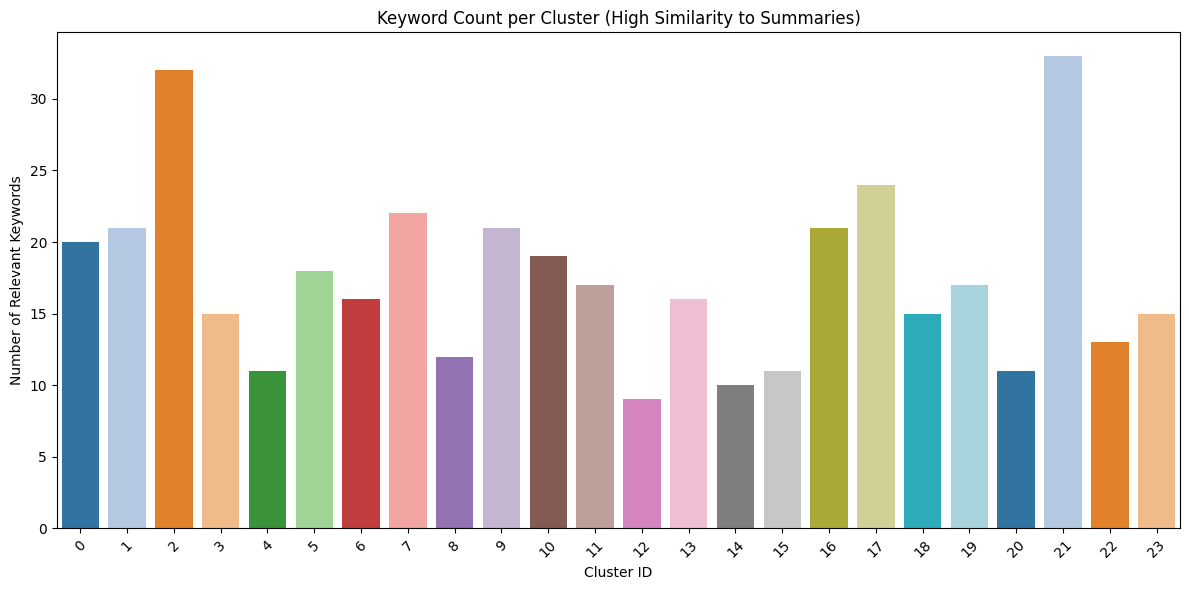

In [80]:
# Prepare data
cluster_ids = list(range(len(cluster_keywords)))
keyword_counts = [len(keywords) for keywords in cluster_keywords]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_ids, y=keyword_counts, palette='tab20')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Relevant Keywords")
plt.title("Keyword Count per Cluster (High Similarity to Summaries)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
from collections import Counter
from scipy.spatial.distance import cosine

# Number of clusters
num_clusters = NUM_OF_CLUSTERS

# Initialize 2D list to hold top 20 keywords per cluster
cluster_keywords = []

# Loop through all clusters
for cluster_id in range(num_clusters):
    # Get summaries in this cluster
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'filtered_tokens', 'vector']]

    # List to collect all keywords in this cluster
    all_keywords = []

    # Process each summary in the cluster
    for idx, row in cluster_df.iterrows():
        tokens = row['filtered_tokens']
        summary_vector = row['vector']

        word_similarities = []

        # Use set(tokens) to avoid duplicate words within a summary
        for word in set(tokens):
            if word in w2v_model.wv:
                word_vector = w2v_model.wv[word]
                similarity = 1 - cosine(word_vector, summary_vector) if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0 else 0
                word_similarities.append((word, similarity))

        # Sort words by decreasing similarity
        word_similarities.sort(key=lambda x: x[1], reverse=True)

        # Add words from this summary to the cluster's keyword list
        summary_keywords = [word for word, sim in word_similarities]
        all_keywords.extend(summary_keywords)

    # Count frequency of each word in this cluster
    keyword_counts = Counter(all_keywords)

    # Get top 20 most frequent keywords
    top_20_keywords = [word for word, count in keyword_counts.most_common(20)]

    # Append to the 2D list
    cluster_keywords.append(top_20_keywords)

# Print the 2D list
for cluster_id, keywords in enumerate(cluster_keywords):
    print(f"\nTop 20 keywords for Cluster {cluster_id}:")
    print(keywords)


Top 20 keywords for Cluster 0:
['result', 'network', 'neural', 'quality', 'function', 'logistic', 'random', 'improve', 'parametric', 'backward', 'forest', 'engineering', 'forward', 'combination', 'best', 'weight', 'classification', 'polynomial', 'improving', 'fine']

Top 20 keywords for Cluster 1:
['adjusted', 'test', 'training', 'r', 'python', 'plot', 'split', 'degree', 'freedom', 'matrix', 'square', 'testing', 'solution', 'distribution', 'variance', 'line', 'close', 'form', 'good', 'learned']

Top 20 keywords for Cluster 2:
['dimensionality', 'curse', 'problem', 'variance', 'midsem', 'factor', 'inflation', 'outlier', 'missing', 'dataset', 'eda', 'reduction', 'selection', 'solution', 'heart', 'disease', 'exam', 'vif', 'number', 'plot']

Top 20 keywords for Cluster 3:
['learning', 'nominal', 'measurement', 'ordinal', 'ratio', 'unsupervised', 'interval', 'level', 'supervised', 'label', 'continuous', 'x', 'classification', 'discrete', 'temperature', 'gender', 'clustering', 'machine', 'e

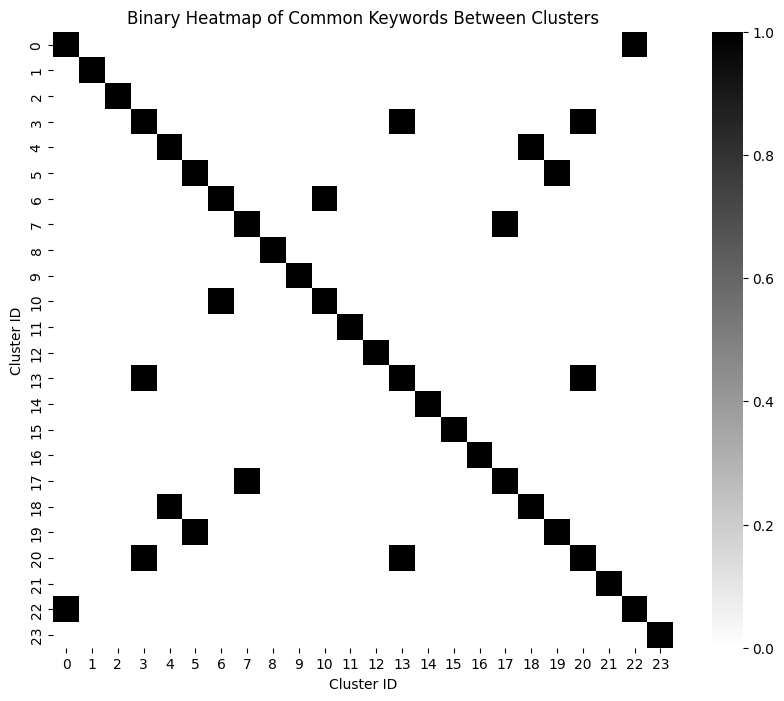

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty matrix to hold the binary values
binary_common_keywords_matrix = np.zeros((num_clusters, num_clusters))

# Loop through all pairs of clusters
for i in range(num_clusters):
    for j in range(i, num_clusters):
        # Find the common keywords between cluster i and cluster j
        common_keywords = set(cluster_keywords[i]) & set(cluster_keywords[j])
        # If the number of common keywords is greater than 8, set it to 1 (black), else 0 (white)
        common_count = len(common_keywords)
        if common_count > 10:
            binary_common_keywords_matrix[i, j] = 1
            binary_common_keywords_matrix[j, i] = 1

# Plot the binary heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(binary_common_keywords_matrix, annot=False, cmap="binary", xticklabels=range(num_clusters), yticklabels=range(num_clusters))
plt.title("Binary Heatmap of Common Keywords Between Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Cluster ID")
plt.show()

In [88]:
from collections import defaultdict

# Step 1: Build graph of cluster connections from same_session_clusters
graph = defaultdict(list)
for i, j, _ in same_session_clusters:
    graph[i].append(j)
    graph[j].append(i)

# Step 2: DFS to find connected components (i.e., groups to be merged)
visited = set()
merged_cluster_groups = []

def dfs(node, group):
    visited.add(node)
    group.append(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, group)

for node in range(num_clusters):
    if node not in visited:
        group = []
        dfs(node, group)
        merged_cluster_groups.append(group)

# Step 3: Merge keywords based on groups
merged_keywords_set = set()
new_cluster_keywords = []

for group in merged_cluster_groups:
    merged_keywords = []
    for cluster_id in group:
        merged_keywords.extend(cluster_keywords[cluster_id])
        merged_keywords_set.add(cluster_id)
    merged_keywords = list(set(merged_keywords))  # Remove duplicates
    new_cluster_keywords.append(merged_keywords)

# Step 4: Add clusters that were not merged
for cluster_id in range(num_clusters):
    if cluster_id not in merged_keywords_set:
        new_cluster_keywords.append(cluster_keywords[cluster_id])

# Step 5: Print result
print(f"\n✅ New number of clusters after automatic merging: {len(new_cluster_keywords)}")
for cluster_id, keywords in enumerate(new_cluster_keywords):
    print(f"Cluster {cluster_id}: {len(keywords)} keywords")



✅ New number of clusters after automatic merging: 17
Cluster 0: 26 keywords
Cluster 1: 20 keywords
Cluster 2: 20 keywords
Cluster 3: 28 keywords
Cluster 4: 24 keywords
Cluster 5: 29 keywords
Cluster 6: 27 keywords
Cluster 7: 26 keywords
Cluster 8: 20 keywords
Cluster 9: 20 keywords
Cluster 10: 20 keywords
Cluster 11: 20 keywords
Cluster 12: 20 keywords
Cluster 13: 20 keywords
Cluster 14: 20 keywords
Cluster 15: 20 keywords
Cluster 16: 20 keywords


In [89]:
print(f"\nNew number of clusters after automatic merging: {len(new_cluster_keywords)}\n")

for cluster_id, keywords in enumerate(new_cluster_keywords):
    print(f"Cluster {cluster_id}: {len(keywords)} keywords")
    print(", ".join(keywords))  # Print all keywords in a single line
    print("-" * 80)  # Separator for readability


New number of clusters after automatic merging: 17

Cluster 0: 26 keywords
neural, improving, based, logistic, quality, weight, learning, forward, forest, engineering, sigmoid, function, random, backward, polynomial, fine, result, layer, parametric, best, classification, network, deep, combination, improve, selection
--------------------------------------------------------------------------------
Cluster 1: 20 keywords
distribution, line, variance, plot, test, python, learned, split, square, good, form, freedom, solution, testing, close, adjusted, matrix, degree, training, r
--------------------------------------------------------------------------------
Cluster 2: 20 keywords
inflation, heart, exam, midsem, variance, plot, reduction, disease, vif, outlier, eda, factor, dataset, curse, solution, number, missing, selection, dimensionality, problem
--------------------------------------------------------------------------------
Cluster 3: 28 keywords
x, nominal, ml, level, unsupervised,